In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
red = pd.read_csv("Red_Light_Camera_Violations.csv")

In [79]:
speed = pd.read_csv("Speed_Camera_Violations.csv")

In [80]:
crash = pd.read_csv("Traffic_Crashes.csv")

In [81]:
def split_date1(df):
    df = df.dropna(subset=['VIOLATION DATE'])
    df['YEAR'] = pd.DatetimeIndex(df['VIOLATION DATE']).year
    df['MONTH'] = pd.DatetimeIndex(df['VIOLATION DATE']).month
    return df



In [82]:
def split_date2(df):
    df = df.dropna(subset=['CRASH_DATE'])
    df['YEAR'] = pd.DatetimeIndex(df['CRASH_DATE']).year
    df['MONTH'] = pd.DatetimeIndex(df['CRASH_DATE']).month
    return df

In [68]:
def dataset_new():
    a = rl_vio.groupby(["YEAR","MONTH","PRIM_CONTRIBUTORY_CAUSE","DAMAGE"])["CRASH_RECORD_ID", "INJURIES_TOTAL"].agg(["count","sum"]).reset_index()
    b = pd.DataFrame(columns=["YEAR","MONTH","CAUSE","DAMAGE","RECORDS","INHURES"] )
    b[["YEAR","MONTH","CAUSE","DAMAGE","RECORDS","INHURES"]] = a
    c = rl_vio1.groupby(["YEAR","MONTH"])["VIOLATIONS"].agg("sum").reset_index()
    d = rl_vio2.groupby(["YEAR","MONTH"])["VIOLATIONS"].agg("sum").reset_index()
    return b,c,d

In [83]:
rl_vio = split_date2(crash)
rl_vio1 = split_date1(red)
rl_vio2 = split_date1(speed)

In [84]:
rl_vio.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [85]:
a = rl_vio.groupby(["YEAR","MONTH","PRIM_CONTRIBUTORY_CAUSE","DAMAGE"])["CRASH_RECORD_ID", "INJURIES_TOTAL"].agg(["count","sum"]).reset_index()


<ipython-input-85-f9773e41a4bd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = rl_vio.groupby(["YEAR","MONTH","PRIM_CONTRIBUTORY_CAUSE","DAMAGE"])["CRASH_RECORD_ID", "INJURIES_TOTAL"].agg(["count","sum"]).reset_index()


In [86]:
a.columns


MultiIndex([(                   'YEAR',      ''),
            (                  'MONTH',      ''),
            ('PRIM_CONTRIBUTORY_CAUSE',      ''),
            (                 'DAMAGE',      ''),
            (        'CRASH_RECORD_ID', 'count'),
            (        'CRASH_RECORD_ID',   'sum'),
            (         'INJURIES_TOTAL', 'count'),
            (         'INJURIES_TOTAL',   'sum')],
           )

In [90]:
a = a.iloc[:,[0,1,2,3,4,7]]

In [91]:
a

,YEAR,MONTH,PRIM_CONTRIBUTORY_CAUSE,DAMAGE,CRASH_RECORD_ID,INJURIES_TOTAL
,,,,,count,sum
0,2013,3,IMPROPER LANE USAGE,"OVER $1,500",1,2.0
1,2014,1,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",1,1.0
2,2014,1,UNABLE TO DETERMINE,"OVER $1,500",1,0.0
3,2014,2,UNABLE TO DETERMINE,"$501 - $1,500",1,0.0
4,2014,6,IMPROPER OVERTAKING/PASSING,"$501 - $1,500",1,0.0
...,...,...,...,...,...,...
6620,2021,4,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...","$501 - $1,500",9,1.0
6621,2021,4,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...","OVER $1,500",23,12.0
6622,2021,4,WEATHER,$500 OR LESS,3,0.0


In [100]:
b = pd.DataFrame(columns=["YEAR","MONTH","CAUSE","DAMAGE","RECORDS","INJURIES"] )
b[["YEAR","MONTH","CAUSE","DAMAGE","RECORDS","INJURIES"]] = a

In [102]:
b["INJURIES"] = b["INJURIES"].astype("int32")

<BarContainer object of 6625 artists>

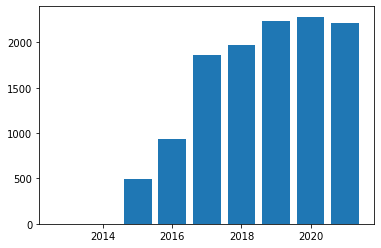

In [103]:
plt.bar(b["YEAR"],b["RECORDS"])

In [59]:
rl_vio2

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,YEAR,MONTH
0,1111 N HUMBOLDT,CHI010,04/10/2015,67,NaN,NaN,NaN,NaN,NaN,2015,4
1,1111 N HUMBOLDT,CHI010,04/25/2015,71,NaN,NaN,NaN,NaN,NaN,2015,4
2,1111 N HUMBOLDT,CHI010,04/14/2015,38,NaN,NaN,NaN,NaN,NaN,2015,4
3,1111 N HUMBOLDT,CHI010,04/16/2015,55,NaN,NaN,NaN,NaN,NaN,2015,4
4,1111 N HUMBOLDT,CHI010,04/24/2015,54,NaN,NaN,NaN,NaN,NaN,2015,4
...,...,...,...,...,...,...,...,...,...,...,...
248255,5509 W FULLERTON,CHI041,03/23/2021,3,1.139212e+06,1.915373e+06,41.923897,-87.763906,"(41.92389747217995, -87.76390557836874)",2021,3
248256,2417 W 103RD ST,CHI165,03/15/2021,14,1.161996e+06,1.836227e+06,41.706268,-87.682391,"(41.70626766073214, -87.68239147238012)",2021,3
248257,1901 E 75TH ST,CHI138,03/16/2021,42,1.190192e+06,1.855580e+06,41.758741,-87.578519,"(41.758740770124234, -87.57851859043261)",2021,3
248258,3521 N WESTERN,CHI026,03/23/2021,4,1.159788e+06,1.923418e+06,41.945574,-87.688078,"(41.945574090874274, -87.68807785258112)",2021,3


In [62]:
c = rl_vio2.groupby(["YEAR","MONTH"])["VIOLATIONS"].agg("sum").reset_index()

In [65]:
c.groupby("YEAR")["VIOLATIONS"].sum()

YEAR
2014     659424
2015    1201698
2016    1116805
2017    1015490
2018     961543
2019     862596
2020     800594
2021     247102
Name: VIOLATIONS, dtype: int64

In [66]:
d = rl_vio1.groupby(["YEAR","MONTH"])["VIOLATIONS"].agg("sum").reset_index()

In [72]:
d.to_csv("Red_Light.csv")

In [73]:
c.to_csv("Speed.csv")

In [105]:
b.to_csv("Crash.csv")

In [104]:
b

,YEAR,MONTH,CAUSE,DAMAGE,RECORDS,INJURIES
0,2013,3,IMPROPER LANE USAGE,"OVER $1,500",1,2
1,2014,1,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",1,1
2,2014,1,UNABLE TO DETERMINE,"OVER $1,500",1,0
3,2014,2,UNABLE TO DETERMINE,"$501 - $1,500",1,0
4,2014,6,IMPROPER OVERTAKING/PASSING,"$501 - $1,500",1,0
...,...,...,...,...,...,...
6620,2021,4,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...","$501 - $1,500",9,1
6621,2021,4,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...","OVER $1,500",23,12
6622,2021,4,WEATHER,$500 OR LESS,3,0
6623,2021,4,WEATHER,"$501 - $1,500",3,0
